# Cell/Nuclei Morphology

Cell/nuclei morphologies are often computed to quantify the shape of cells or nuclei. Different morphological metrics can be used, for example, to quantify differences in shapes between cell types or even within a cell type. For example, cells of some type can have varying shape based on their subtype or their localization in the tissue. If you need some intuition on what morphological metrics are, please check out [this old but great slide deck from the University of Guelph](http://www.cyto.purdue.edu/cdroms/micro2/content/education/wirth10.pdf).

In this notebook, We will be looking at the different shape metrics that can be computed with `cellseg_gsontools`. 

## The Data

We'll be taking a look at some glandular epithelial cells and their shapes espically. `cellseg_gsontools` provides a small example segmentation mask that contains a lot glandular epithelial cells.

<Axes: >

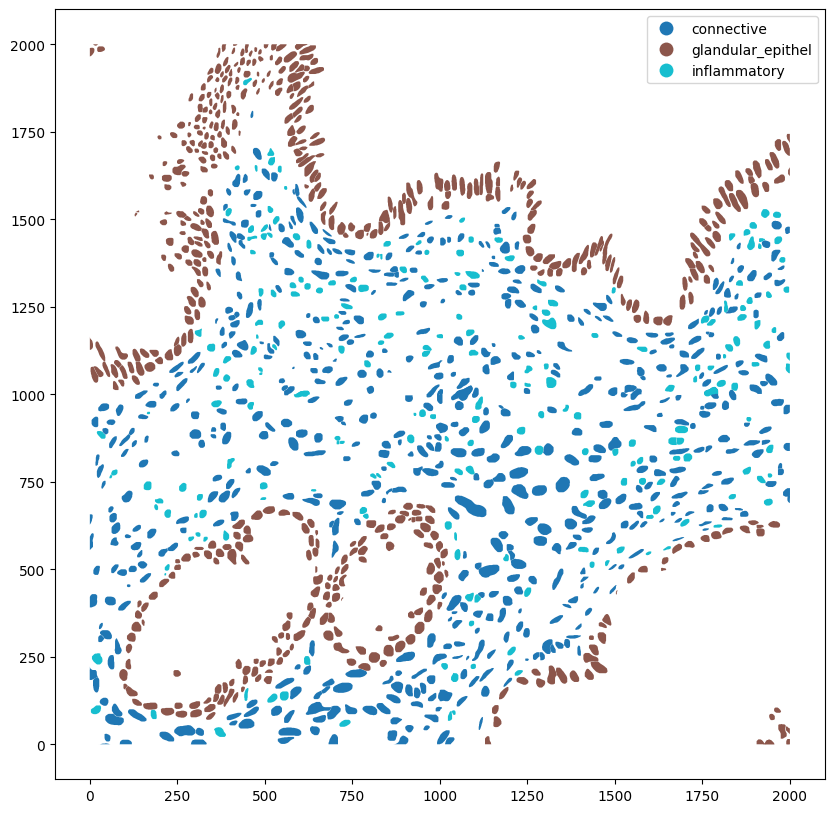

In [1]:
from cellseg_gsontools.data import gland_cells

gc = gland_cells()
gc.plot(column="class_name", figsize=(10,10), legend=True)

In [2]:
gc

,type,geometry,class_name
0,Feature,"POLYGON ((92.000 1083.984, 95.990 1079.993, 99...",glandular_epithel
1,Feature,"POLYGON ((61.005 1085.988, 64.755 1086.000, 68...",glandular_epithel
2,Feature,"POLYGON ((138.997 1093.988, 142.992 1092.988, ...",glandular_epithel
3,Feature,"POLYGON ((109.005 1092.988, 115.995 1092.988, ...",glandular_epithel
4,Feature,"POLYGON ((69.012 1091.997, 70.011 1094.994, 72...",glandular_epithel
...,...,...,...
1354,Feature,"POLYGON ((1932.004 1671.988, 1936.755 1672.000...",glandular_epithel
1355,Feature,"POLYGON ((1944.005 1691.988, 1951.996 1691.988...",glandular_epithel
1356,Feature,"POLYGON ((1981.005 1723.988, 1985.996 1723.988...",glandular_epithel
1357,Feature,"POLYGON ((1962.007 1726.990, 1965.005 1728.988...",glandular_epithel


## Computing Morphological Metrics

We will compute all of the different morphological metrics that are available in `cellseg_gsontools` and then visualize them. The morphological metrics can be computed with the `shape_metric`-function. The available metrics are:

- Area
- Perimeter
- Solidity
- Major Axis Length
- Minor Axis Length
- Major Axis Angle
- Minor Axis Angle
- Convexity
- Compactness
- Circularity
- Eccentricity
- Elongation
- Equivalent Recatangular Index
- Rectangularity
- Squareness
- Sphericity
- Shape Index
- Fractal Dimension


In [3]:
from cellseg_gsontools.geometry import shape_metric

metrics = [
    "area",
    "solidity",
    "major_axis_len",
    "major_axis_angle",
    "minor_axis_len",
    "minor_axis_angle",
    "convexity",
    "compactness",
    "circularity",
    "eccentricity",
    "elongation",
    "equivalent_rectangular_index",
    "rectangularity",
    "squareness",
    "sphericity",
    "shape_index",
    "fractal_dimension"
]

gc = shape_metric(
    gc,
    metrics=metrics,
    parallel=True,
)

# compute perimeter
metrics.append("perimeter")
gc["perimeter"] = gc.length
gc

,type,geometry,class_name,area,solidity,major_axis_len,major_axis_angle,minor_axis_len,minor_axis_angle,convexity,...,circularity,eccentricity,elongation,equivalent_rectangular_index,rectangularity,squareness,sphericity,shape_index,fractal_dimension,perimeter
0,Feature,"POLYGON ((92.000 1083.984, 95.990 1079.993, 99...",glandular_epithel,520.239144,0.966439,42.279910,157.380527,15.206325,67.380527,0.998190,...,0.664169,0.933084,0.599828,0.777647,0.809179,0.842588,0.298672,0.607703,0.933084,99.392555
1,Feature,"POLYGON ((61.005 1085.988, 64.755 1086.000, 68...",glandular_epithel,565.581197,0.979205,42.556314,164.055301,18.107017,74.055301,0.998635,...,0.720651,0.904966,0.549867,0.702213,0.733980,0.915058,0.377672,0.628537,0.904966,99.445024
2,Feature,"POLYGON ((138.997 1093.988, 142.992 1092.988, ...",glandular_epithel,721.500898,0.992876,45.132745,157.165715,20.639463,67.165715,0.998725,...,0.764039,0.889310,0.609533,0.729744,0.774545,0.970325,0.417713,0.671005,0.889310,109.073619
3,Feature,"POLYGON ((109.005 1092.988, 115.995 1092.988, ...",glandular_epithel,435.911486,0.982687,35.627477,165.963336,14.965253,75.963336,0.998602,...,0.734751,0.907502,0.575812,0.772660,0.817578,0.932899,0.370378,0.650374,0.907502,86.465279
4,Feature,"POLYGON ((69.012 1091.997, 70.011 1094.994, 72...",glandular_epithel,302.260204,1.000000,22.618201,134.951251,14.843037,44.951251,1.000000,...,0.869898,0.754550,0.999997,0.836853,0.900327,1.107589,0.582249,0.807680,0.754550,66.078655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Feature,"POLYGON ((1932.004 1671.988, 1936.755 1672.000...",glandular_epithel,473.859283,1.000000,36.154051,155.225946,15.899675,65.225946,1.000000,...,0.767510,0.898108,0.687020,0.768171,0.824336,0.977224,0.396189,0.674762,0.898108,88.082112
1355,Feature,"POLYGON ((1944.005 1691.988, 1951.996 1691.988...",glandular_epithel,803.788422,0.993490,51.851271,153.435627,19.205898,63.435627,0.999133,...,0.705127,0.928871,0.595539,0.757277,0.807138,0.896240,0.344882,0.616768,0.928871,119.789518
1356,Feature,"POLYGON ((1981.005 1723.988, 1985.996 1723.988...",glandular_epithel,603.424619,0.995804,46.700700,162.474799,17.039395,72.474799,0.999346,...,0.675694,0.931061,0.511644,0.724112,0.758308,0.859195,0.324170,0.589923,0.931061,106.004838
1357,Feature,"POLYGON ((1962.007 1726.990, 1965.005 1728.988...",glandular_epithel,509.535284,1.000000,33.989143,0.026300,17.986912,90.026300,1.000000,...,0.829131,0.848500,0.529248,0.771767,0.833446,1.055682,0.466899,0.743267,0.848500,87.878070


## Plotting the Metrics

Let's start plotting these metrics if we can see some differences between the cell types present.

In [4]:
# !pip install seaborn

In [5]:
import seaborn

# Let's first define a quick function to plot the data distributions with seaborn
def plot_kde(tidy_data):
    seaborn.set_style("whitegrid")
    seaborn.set(font_scale=1.5)

    # Setup the facets
    facets = seaborn.FacetGrid(
        data=tidy_data,
        col="Attribute",
        hue="Cell Type",
        sharey=False,
        sharex=False,
        aspect=2,
        col_wrap=2,
    )

    # Build the plot from `sns.kdeplot`
    kde_ax = facets.map(seaborn.kdeplot, "Values", fill=True).add_legend()
    return kde_ax

Let's tidy up the data first

In [6]:
m = list(metrics)
tidy = gc.reset_index().set_index("class_name")
tidy = tidy[m]
tidy = tidy.stack()
tidy = tidy.reset_index()
tidy = tidy.rename(
    columns={"class_name": "Cell Type", "level_1": "Attribute", 0: "Values"}
)
tidy

,Cell Type,Attribute,Values
0,glandular_epithel,area,520.239144
1,glandular_epithel,solidity,0.966439
2,glandular_epithel,major_axis_len,42.279910
3,glandular_epithel,major_axis_angle,157.380527
4,glandular_epithel,minor_axis_len,15.206325
...,...,...,...
24457,glandular_epithel,squareness,0.448333
24458,glandular_epithel,sphericity,0.212360
24459,glandular_epithel,shape_index,0.424890
24460,glandular_epithel,fractal_dimension,0.962722


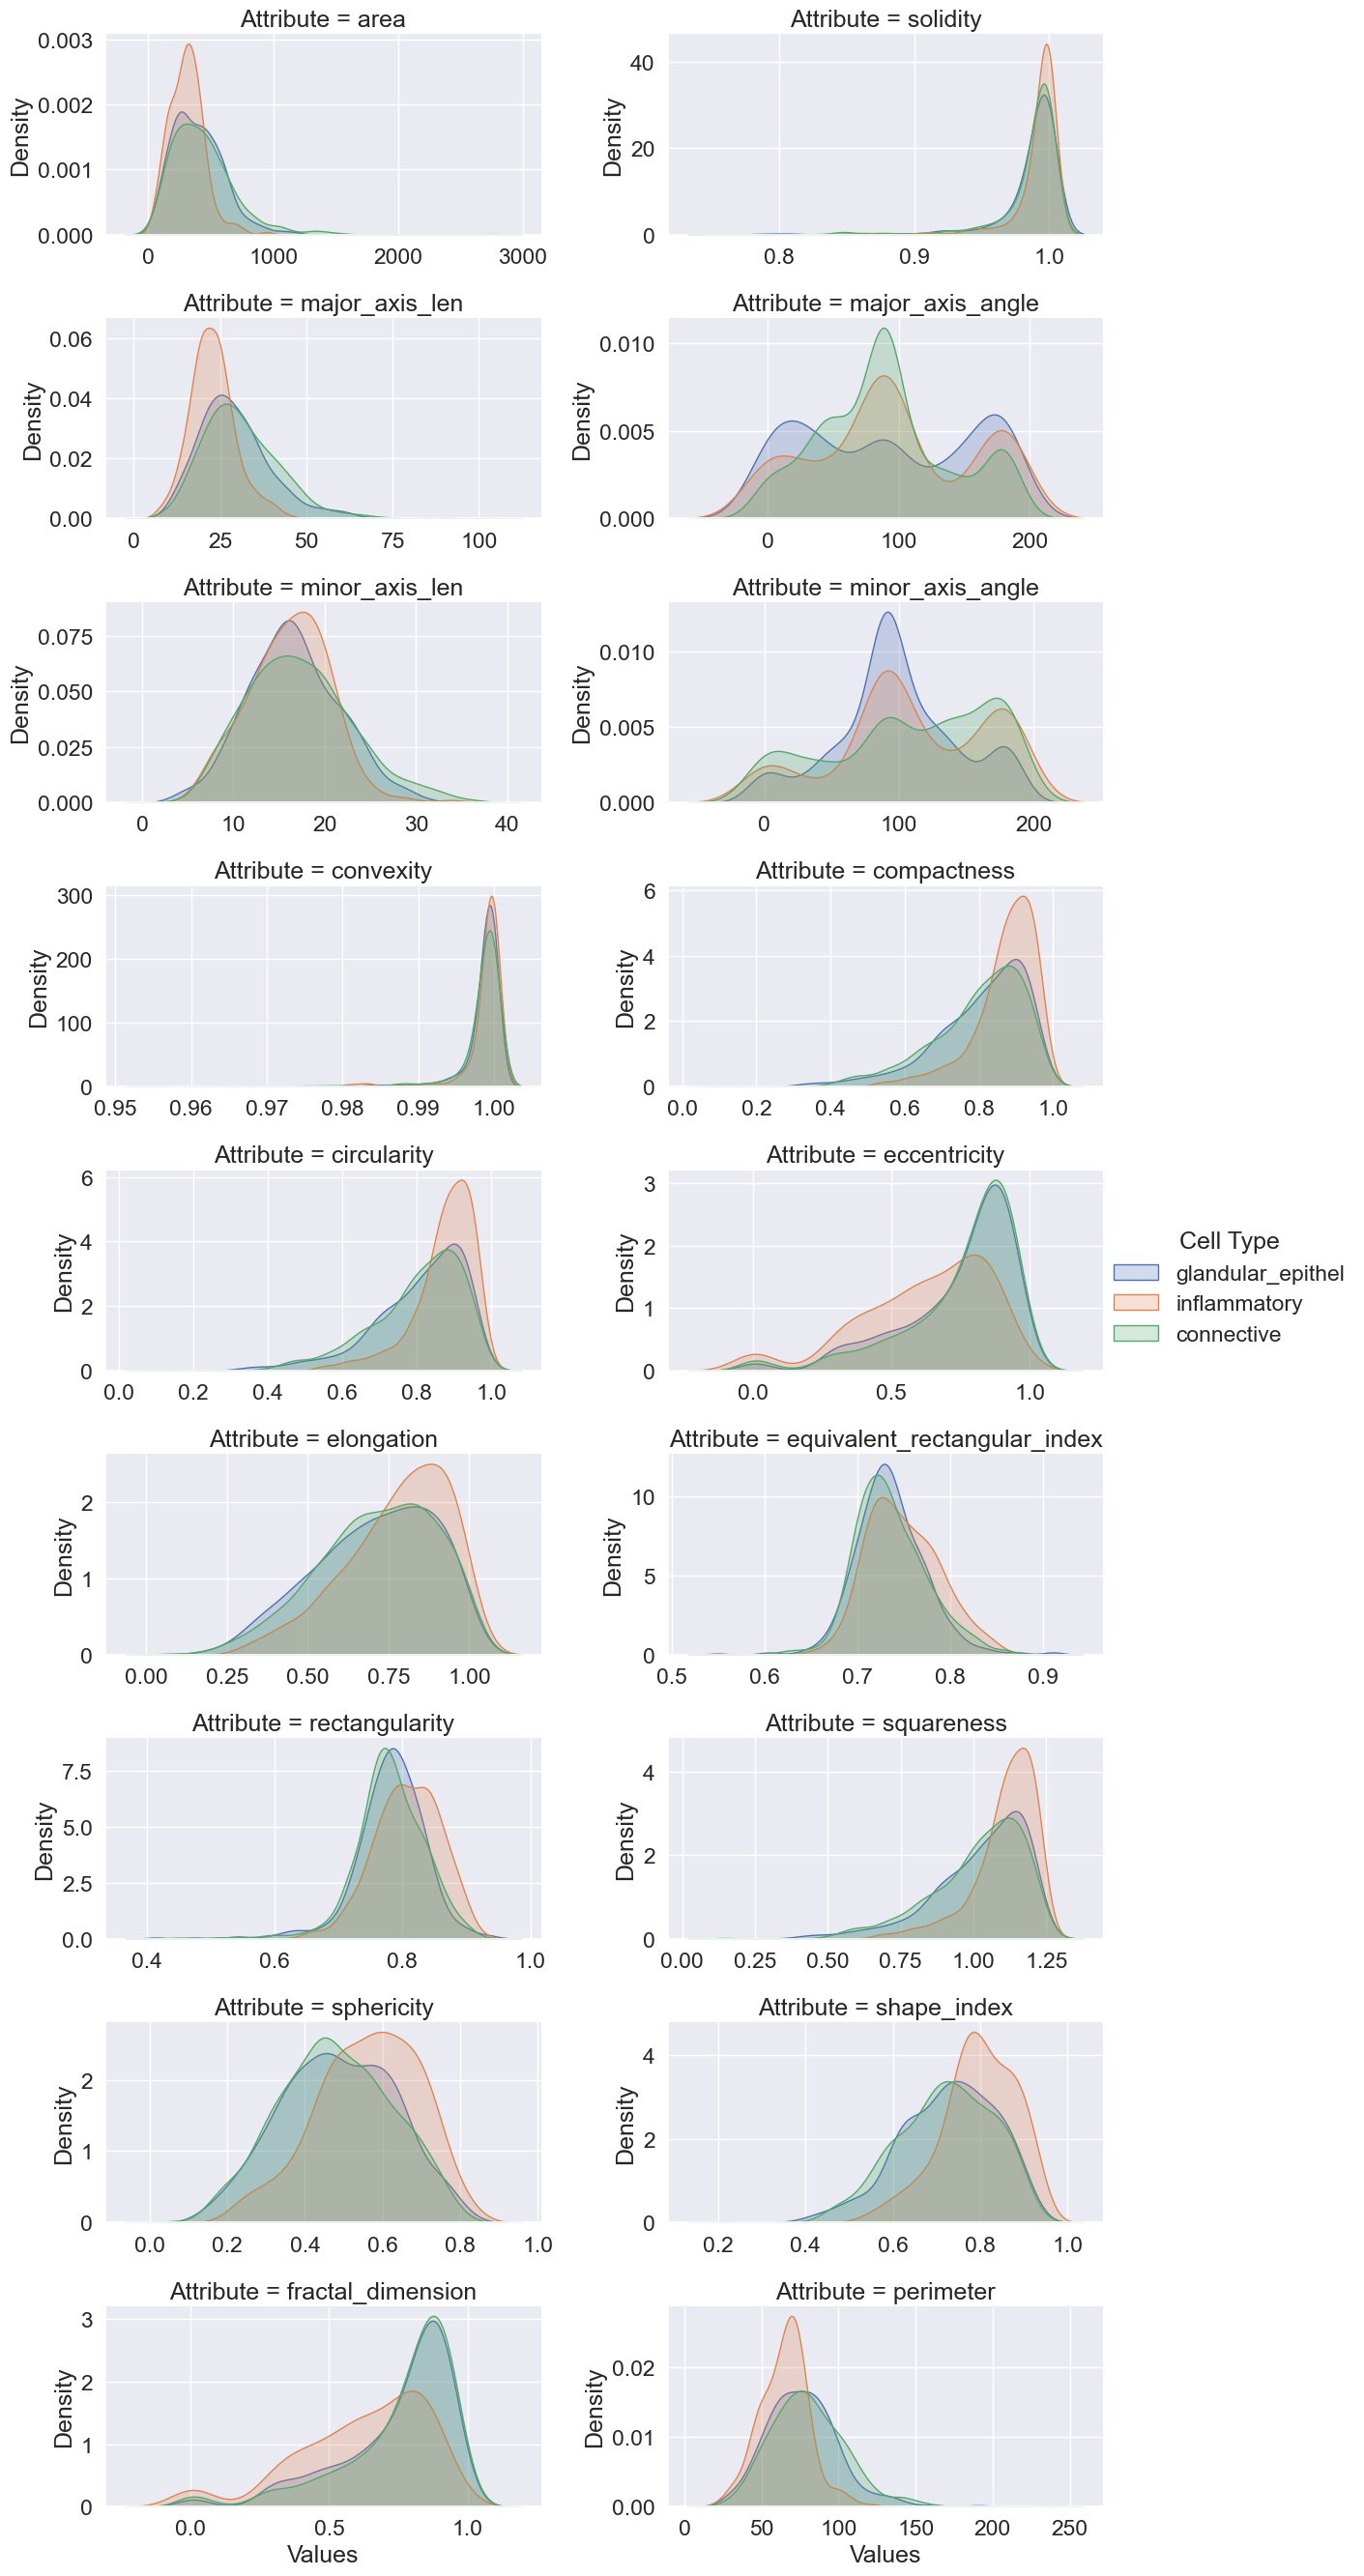

In [7]:
plot_kde(tidy)

We can clearly see that the inflammatory cells differ from the stormal and glandular cells based on the distributions. They tend to be smaller, more circular, compact, spherical and have a lower major axis length, eccentricity and fractal dimension (fractal dimension measures the complexity of the boundary). This is in line with what we would expect from inflammatory cells, since they are a lot smaller and have less variance in their shapes than stromal or epithelial cells. On the other hand, the glandular epithelial cells and stromal/connective cells are much more similar in their shape distributions. 

## Spatial Distributions of Morphological Metrics

Let's now look at how the metrics distribute spatially.

In [8]:
# !pip install legendgram

<Axes: >

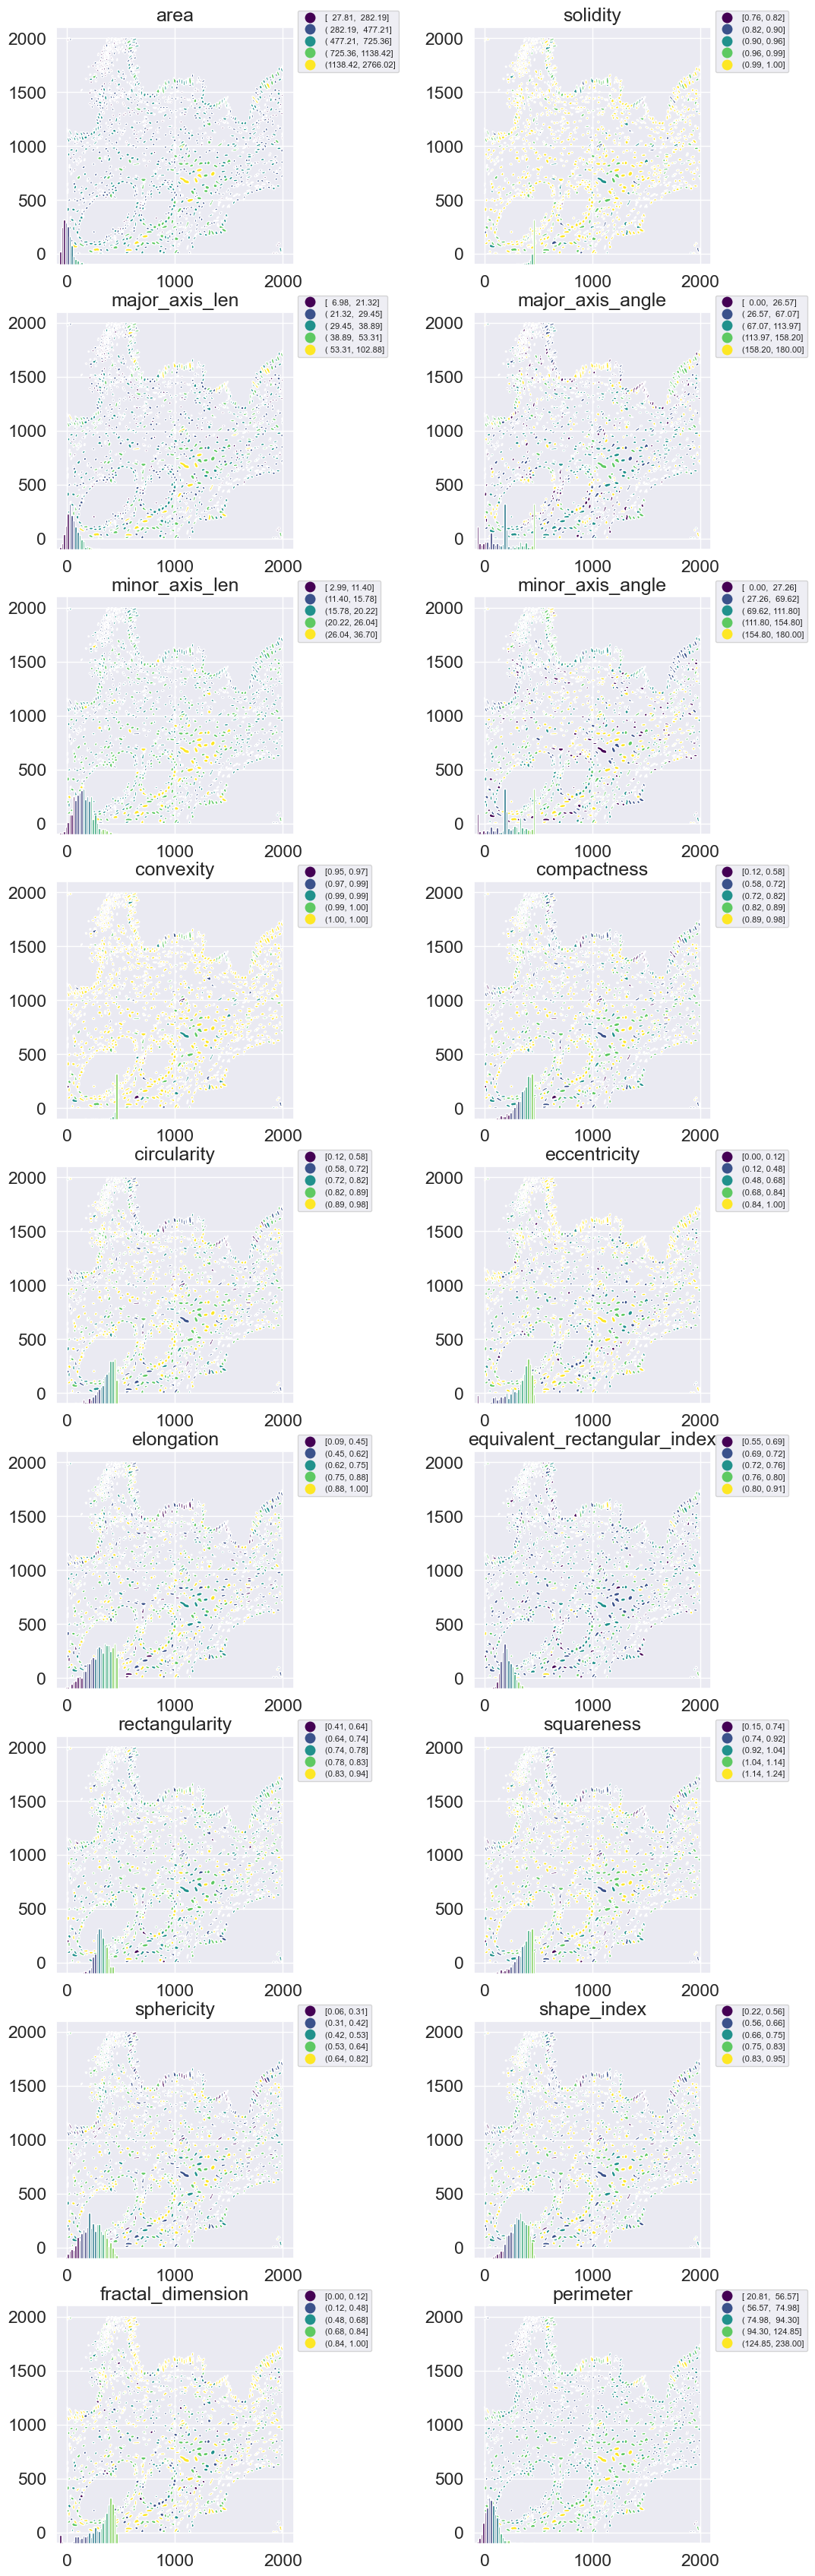

In [9]:
import mapclassify
import geopandas as gpd
import matplotlib.pyplot as plt
import palettable as palet
from legendgram import legendgram


# helper function to replace legend items
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k, v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)
    

# Helper function to plot cells with a feature value highlighted
def plot_cells(f, ax, cells: gpd.GeoDataFrame, col: str):
    # bin the values with the Fisher-Jenks method
    bins = mapclassify.FisherJenks(cells[col], k=5)
    cells["bin_vals"] = bins.yb

    ax = cells.plot(
        ax=ax,
        column="bin_vals",
        cmap="viridis",
        categorical=True,
        legend=True,
        legend_kwds={
            "fontsize": 8,
            "loc": "center left",
            "bbox_to_anchor": (1.0, 0.94),
        },
    )

    bin_legends = bins.get_legend_classes()
    mapping = dict([(i, s) for i, s in enumerate(bin_legends)])
    replace_legend_items(ax.get_legend(), mapping)
    ax.set_title(col)
    ax = legendgram(
        f,
        ax,
        cells[col],
        bins=30,
        breaks=bins.bins,
        pal=palet.matplotlib.Viridis_5,
        loc="lower left",
    )
    ax.set_axis_off()

    return ax

fig, ax = plt.subplots(9, 2, figsize=(13, 43))
ax = ax.flatten()
plot_cells(fig, ax[0], gc, "area")
plot_cells(fig, ax[1], gc, "solidity")
plot_cells(fig, ax[2], gc, "major_axis_len")
plot_cells(fig, ax[3], gc, "major_axis_angle")
plot_cells(fig, ax[4], gc, "minor_axis_len")
plot_cells(fig, ax[5], gc, "minor_axis_angle")
plot_cells(fig, ax[6], gc, "convexity")
plot_cells(fig, ax[7], gc, "compactness")
plot_cells(fig, ax[8], gc, "circularity")
plot_cells(fig, ax[9], gc, "eccentricity")
plot_cells(fig, ax[10], gc, "elongation")
plot_cells(fig, ax[11], gc, "equivalent_rectangular_index")
plot_cells(fig, ax[12], gc, "rectangularity")
plot_cells(fig, ax[13], gc, "squareness")
plot_cells(fig, ax[14], gc, "sphericity")
plot_cells(fig, ax[15], gc, "shape_index")
plot_cells(fig, ax[16], gc, "fractal_dimension")
plot_cells(fig, ax[17], gc, "perimeter")


From the plot above, we can see some spatial patterns. For example, we can see that the high eccentricity and high fractal dimension cells are located in the upper glandular epithelium. We can also see that the largest cells are located in the center of the image in the stroma and the high sphericity cells seem to be mostly the immune cells in the stroma. All of the cells seem to be quite solid and non-convex meaning that there are little irregular boundaries among the cells. All of these results are expected and in line with what we would expect from the different cell types.  